#### Simulation of O(N) model in square lattice with periodic boundary condition
The Hamiltonian is given by:
$H = -J \sum_{<ij>} \mathbf{S}_i \cdot \mathbf{S}_j$
where $J$ is the exchange interaction, $\mathbf{S}_i$ is the spin at site $i$, and the sum is over all nearest neighbor pairs.


In [7]:

'''
Parameters:
spin (ndarray): The spin configuration array.
nbor (ndarray): The neighbor indices array.
temp (float): The temperature of the system.
wsteps (int): The number of Wolff steps to perform.
msteps (int): The number of Metropolis steps to perform.
on (int): The number of spin components. eg. 1 for Ising model, 2 for XY model
n (int): The total number of spins.
'''
import numpy as np
l=16;n=l**2;on=2;wsteps=1000;msteps=1;temp=np.float64(0.1)
clusters=[]
nbor=np.zeros([n,6],dtype=int)
spin=np.random.normal(0,1,[on,n]) #keepdims
spin/=np.sqrt(np.sum(spin**2,0))
for i in range(n):
    x=i%l; y=i//l
    nbor[i,0]=(x+1)%l+y*l
    nbor[i,1]=(x-1+l)%l+y*l
    nbor[i,2]=x+(y+1)%l*l
    nbor[i,3]=x+(y-1+l)%l*l
    
print('initialization done')

initialization done


**Metropolis Algorithm**

The Metropolis algorithm is a Monte Carlo method used to simulate systems in statistical mechanics, particularly useful for spin systems in lattice models.

Steps:
1. Start with an initial configuration.
2. Randomly select a spin and propose a new state.
3. Calculate the change in energy (ΔE).
4. Accept the change if ΔE < 0 or with probability exp(-ΔE / T) if ΔE > 0.
5. Repeat for many iterations to reach equilibrium.

In [8]:
def metropolis_algorithm(spin, nbor, temp, msteps, on, n):
    """
    Perform the Metropolis algorithm for a given number of steps.
    
    Returns:
    ndarray: Updated spin configuration array.
    """
    for _ in range(msteps):  
        vect = np.random.randn(on)
        vect /= np.linalg.norm(vect)
        sc = np.random.randint(n)
        enbor = np.sum(spin[:, nbor[sc, :]], 1)
        ei = spin[:, sc] @ enbor
        ef = vect @ enbor
        de = ef - ei
        if de > 0 or np.random.rand() < np.exp(de / temp):
            spin[:, sc] = vect
    return spin

# Call the function
spin = metropolis_algorithm(spin, nbor, temp, msteps, on, n)

**Wolff Algorithm**

Steps:
 1. Select a random spin on the lattice as the starting point for a cluster.
 2. Grow the cluster: Check neighboring spins, and if they are aligned (i.e., have the same value as the current spin), add them to the cluster with a probability given by:
    $P_{add} = 1 - exp(-2K)$
    where $K$ is $J$ for ising model.
 3. Flip the entire cluster: Once the cluster is built, flip all the spins in the cluster (i.e., change +1 to -1 and -1 to +1).


In [9]:
def wolff_algorithm(spin, nbor, temp, wsteps, on, n):
    """
    Perform the Wolff algorithm for a given number of steps.

    Returns:
    ndarray: Updated spin configuration array.
    """
    clusters = []
    for _ in range(wsteps):
        vect = np.random.randn(on)
        vect /= np.sqrt(np.sum(vect**2))
        sc = np.random.randint(n)
        kc = spin[:, sc] @ vect
        spin[:, sc] -= 2 * kc * vect
        clusters.append(sc)
        while clusters:
            sc = clusters[-1]
            clusters.pop()
            kc = spin[:, sc] @ vect
            for j in range(4):
                if nbor[sc, j] not in clusters:  # use set()
                    kn = spin[:, nbor[sc, j]] @ vect
                    k = kn * kc
                    if k < 0:
                        if np.exp(2 * k / temp) < np.random.rand():
                            clusters.append(nbor[sc, j])
                            spin[:, nbor[sc, j]] -= 2 * kn * vect
    return spin

# Call the function
spin = wolff_algorithm(spin, nbor, temp, wsteps, on, n)

In [10]:
m_2=np.sum((np.sum(spin,1)/n)**2)
m_2

0.9496241016648644

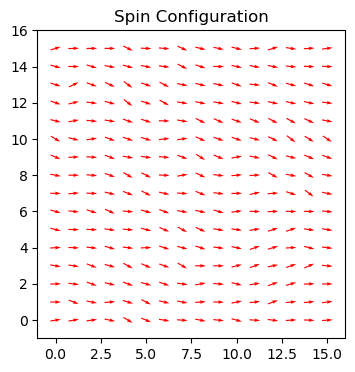

In [11]:
import matplotlib.pyplot as plt

def draw_spin(spin, l, on):
    plt.figure(figsize=(4, 4))
    X, Y = np.meshgrid(range(l), range(l))
    theta = np.arctan2(spin[1], spin[0])
    U = np.cos(theta)
    V = np.sin(theta)  

    plt.quiver(X, Y, U, V, pivot='middle', color='r')
    plt.title('Spin Configuration')
    plt.xlim(-1, l)
    plt.ylim(-1, l)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

draw_spin(spin, l, on=True)